In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/emotions/code

In [73]:
data = pd.read_csv('data/text.csv', index_col=0)
data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

### Data description, visualization and statistical analysis

In [74]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB
None


In [75]:
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

duplicate_entries = data.duplicated().sum()
print(f"Duplicate entries: {duplicate_entries}")

Missing values:
text     0
label    0
dtype: int64
Duplicate entries: 686


In [76]:
for i in range(min(5, len(data))):
    print(data['text'].iloc[i], "\n")

i just feel really helpless and heavy hearted 

ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing 

i gave up my internship with the dmrg and am feeling distraught 

i dont know i feel so lost 

i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative 



In [77]:
data = data.drop_duplicates()

### Data sentiment

In [78]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [79]:
data['polarity'] = data['text'].apply(polarity)
data.head()

,text,label,polarity
0,i just feel really helpless and heavy hearted,4,0.000
1,ive enjoyed being able to slouch about relax a...,0,0.025
2,i gave up my internship with the dmrg and am f...,4,-0.600
3,i dont know i feel so lost,0,0.000
4,i am a kindergarten teacher and i am thoroughl...,4,0.000


In [80]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [81]:
data['sentiment'] = data['polarity'].apply(sentiment)
data.head()

,text,label,polarity,sentiment
0,i just feel really helpless and heavy hearted,4,0.000,Neutral
1,ive enjoyed being able to slouch about relax a...,0,0.025,Positive
2,i gave up my internship with the dmrg and am f...,4,-0.600,Negative
3,i dont know i feel so lost,0,0.000,Neutral
4,i am a kindergarten teacher and i am thoroughl...,4,0.000,Neutral


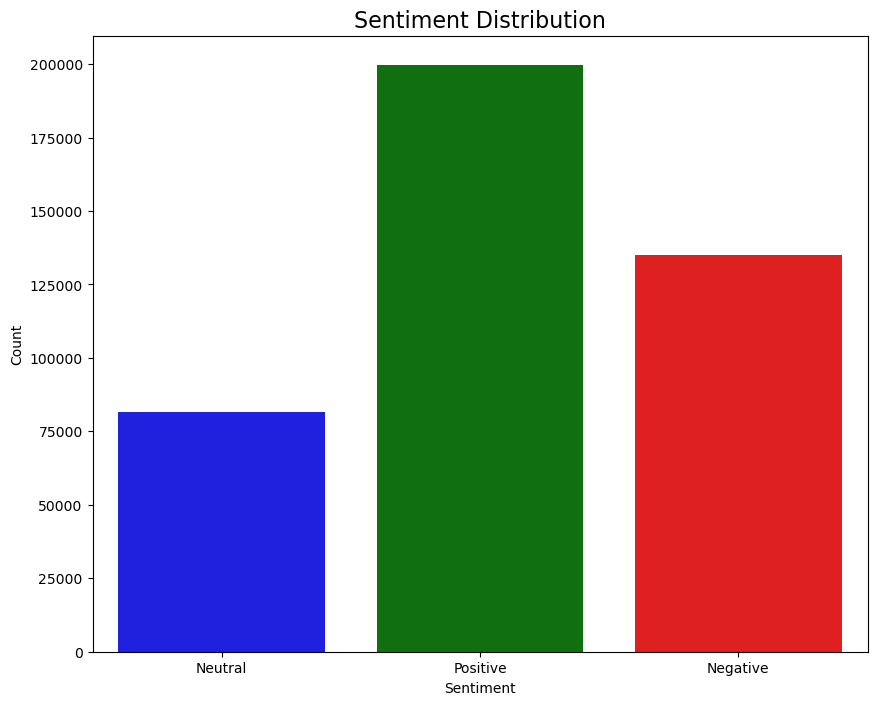

In [82]:
palette = {"Negative": "red", "Neutral": "blue", "Positive": "green"}

plt.figure(figsize=(10, 8))
sns.countplot(x='sentiment', data=data, palette=palette)
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

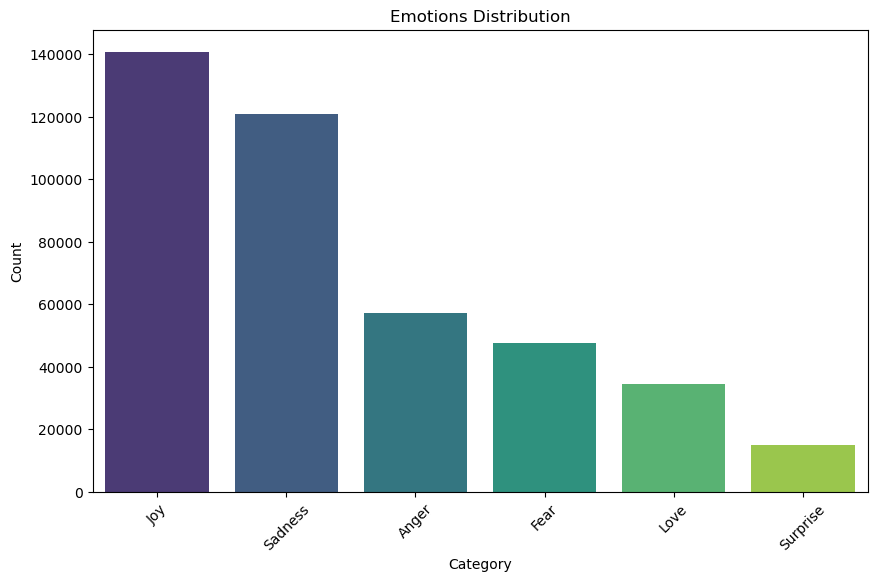

In [83]:
category_dict = {0: "Sadness", 1: "Joy", 2: "Love", 3: "Anger", 4: "Fear", 5: "Surprise"}
data["Category"] = data["label"].map(category_dict)
label_counts = data["Category"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Emotions Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [84]:
group_counts = data['label'].value_counts()
print(group_counts)

label
1    140779
0    120989
3     57235
4     47664
2     34497
5     14959
Name: count, dtype: int64


In [85]:
min_count = group_counts.min()
balanced_df = data.groupby('label').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
print(balanced_df['label'].value_counts())

label
0    14959
1    14959
2    14959
3    14959
4    14959
5    14959
Name: count, dtype: int64


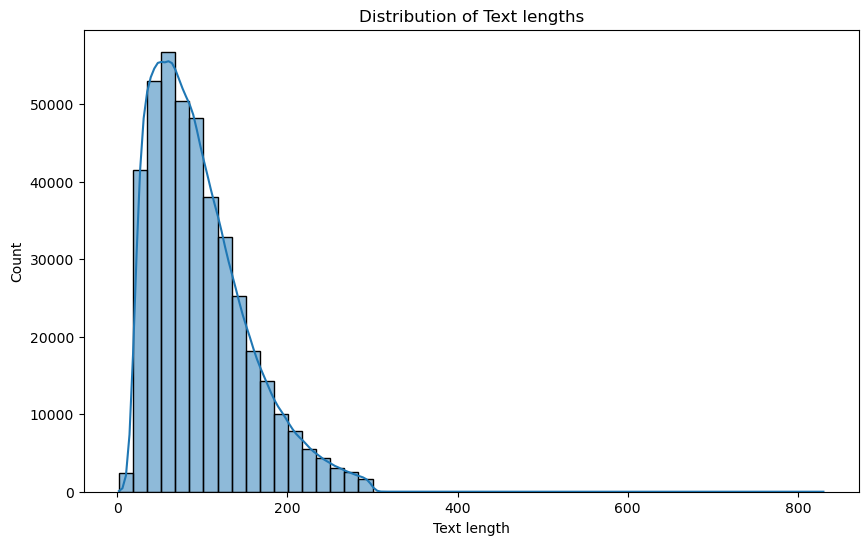

In [86]:
plt.figure(figsize=(10,6))
sns.histplot(data['text'].apply(len), bins=50, kde=True)
plt.title('Distribution of Text lengths')
plt.xlabel('Text length')
plt.ylabel('Count')
plt.show()

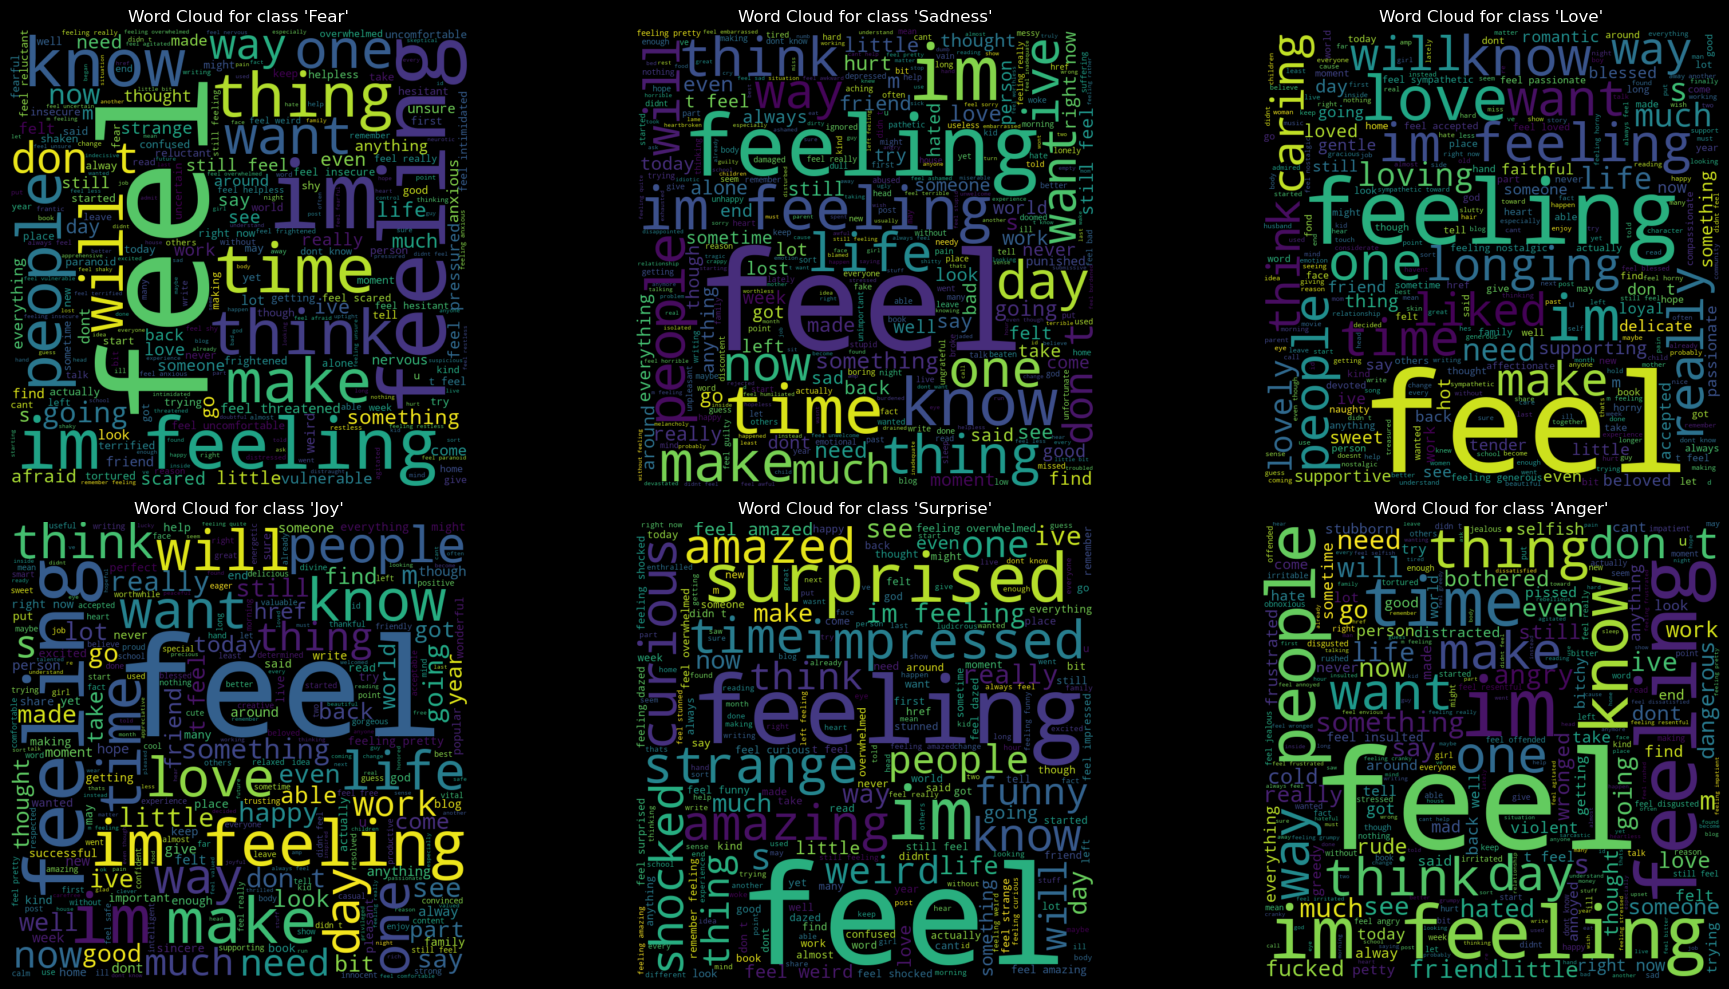

In [87]:
def generate_wordcloud(text, ax, title):
    wordcloud = WordCloud(width=800, height=800, 
                          background_color='black', 
                          stopwords=None, 
                          max_words=400,
                          min_font_size=10).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, color='white')
    ax.axis("off")

fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='black')

for i, label in enumerate(data['label'].unique()):
    text = ' '.join(data[data['label'] == label]['text'])
    row = i // 3
    col = i % 3
    generate_wordcloud(text, axs[row, col], f"Word Cloud for class '{category_dict[label]}'")

plt.tight_layout()
plt.show()

### Data preprocessing